In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define column names based on the provided description
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 
           'marital_status', 'occupation', 'relationship', 'race', 'sex', 
           'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']

# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
data = pd.read_csv(url, header=None, names=columns, na_values=' ?')

# Clean the dataset by replacing '?' with missing values
clean_data = data.copy()
clean_data.replace(' ?', pd.NA, inplace=True)


C:\Users\aleya\AppData\Local\Temp\ipykernel_12432\3813751292.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_distribution = clean_data.groupby(['age_group', 'sex', 'income']).size().unstack(fill_value=0)


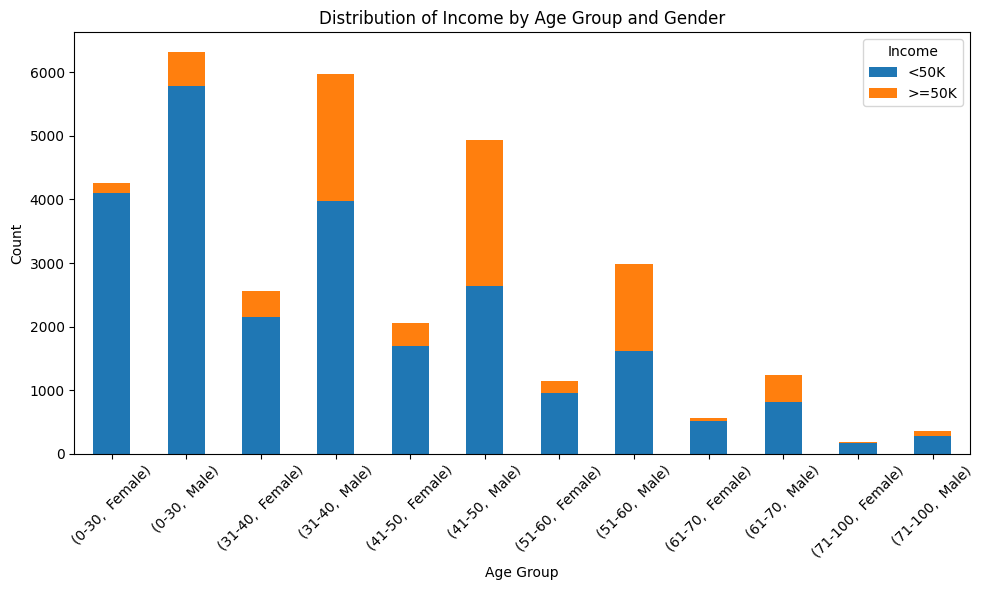

In [3]:

# Define age groups
clean_data['age_group'] = pd.cut(clean_data['age'], bins=[0, 30, 40, 50, 60, 70, 100], labels=['0-30', '31-40', '41-50', '51-60', '61-70', '71-100'])

# Group data by age group and gender, count individuals with income <50K and >=50K
income_distribution = clean_data.groupby(['age_group', 'sex', 'income']).size().unstack(fill_value=0)

# Plot grouped bar chart
income_distribution.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title("Distribution of Income by Age Group and Gender")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Income", labels=["<50K", ">=50K"])
plt.tight_layout()
plt.show()


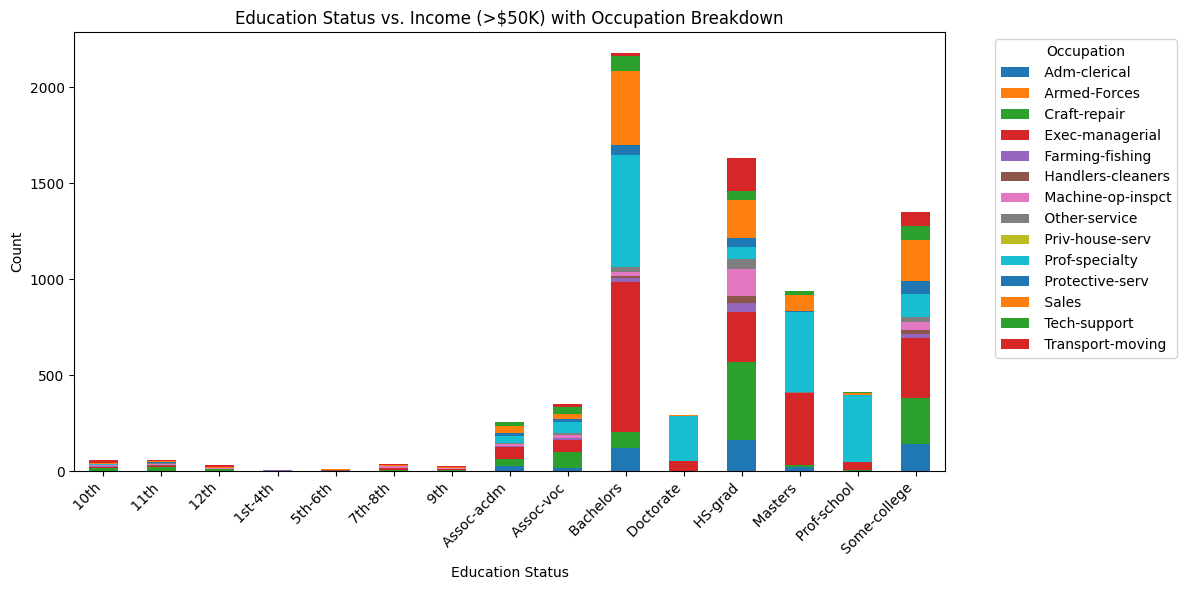

In [4]:

# Filter the data for individuals earning over $50,000
high_income_data = clean_data[clean_data['income'] == ' >50K']

# Group data by education status and occupation, and count occurrences
education_occupation_counts = high_income_data.groupby(['education', 'occupation']).size().unstack()

# Plot the stacked bar chart
education_occupation_counts.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Education Status vs. Income (>$50K) with Occupation Breakdown')
plt.xlabel('Education Status')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Occupation', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



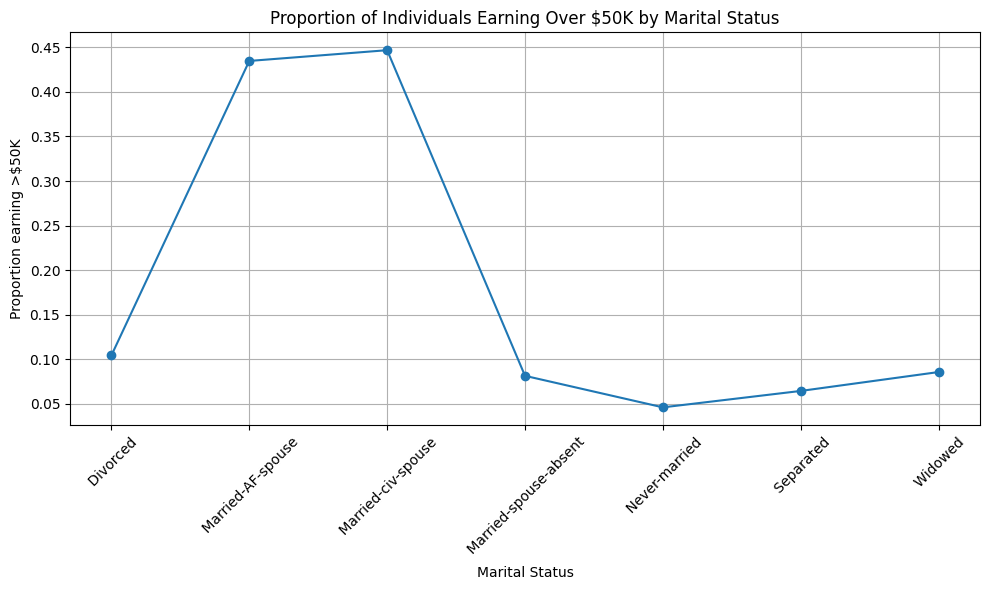

In [5]:
# Group data by marital status and income level, and count the number of individuals
marital_income_counts = clean_data.groupby(['marital_status', 'income']).size().unstack()

# Calculate the proportion of individuals earning over $50K for each marital status
marital_income_proportions = marital_income_counts[' >50K'] / marital_income_counts.sum(axis=1)

# Plot the line graph
marital_income_proportions.plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Proportion of Individuals Earning Over $50K by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Proportion earning >$50K')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.tight_layout()
plt.show()


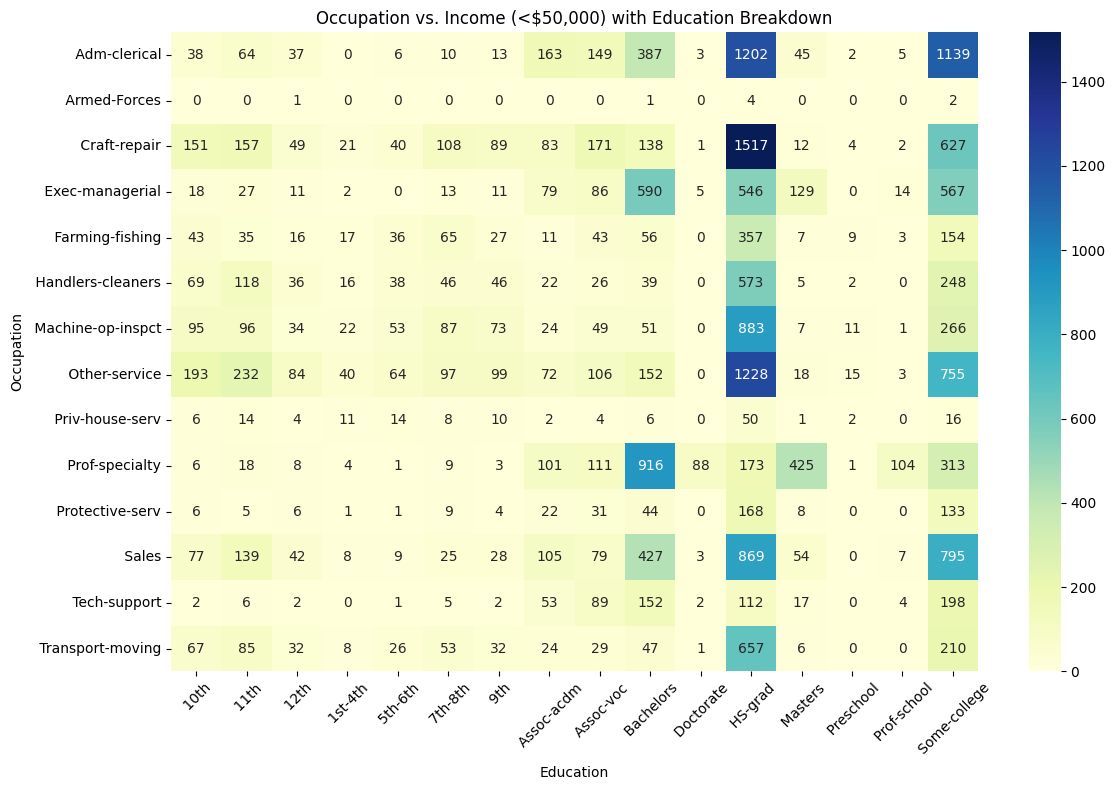

In [6]:

# Filter data for individuals earning less than $50,000
low_income_data = clean_data[clean_data['income'] == ' <=50K']

# Create a pivot table with occupation as rows, education as columns, and count of individuals as values
pivot_table = low_income_data.pivot_table(index='occupation', columns='education', aggfunc='size', fill_value=0)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt='d')
plt.title('Occupation vs. Income (<$50,000) with Education Breakdown')
plt.xlabel('Education')
plt.ylabel('Occupation')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


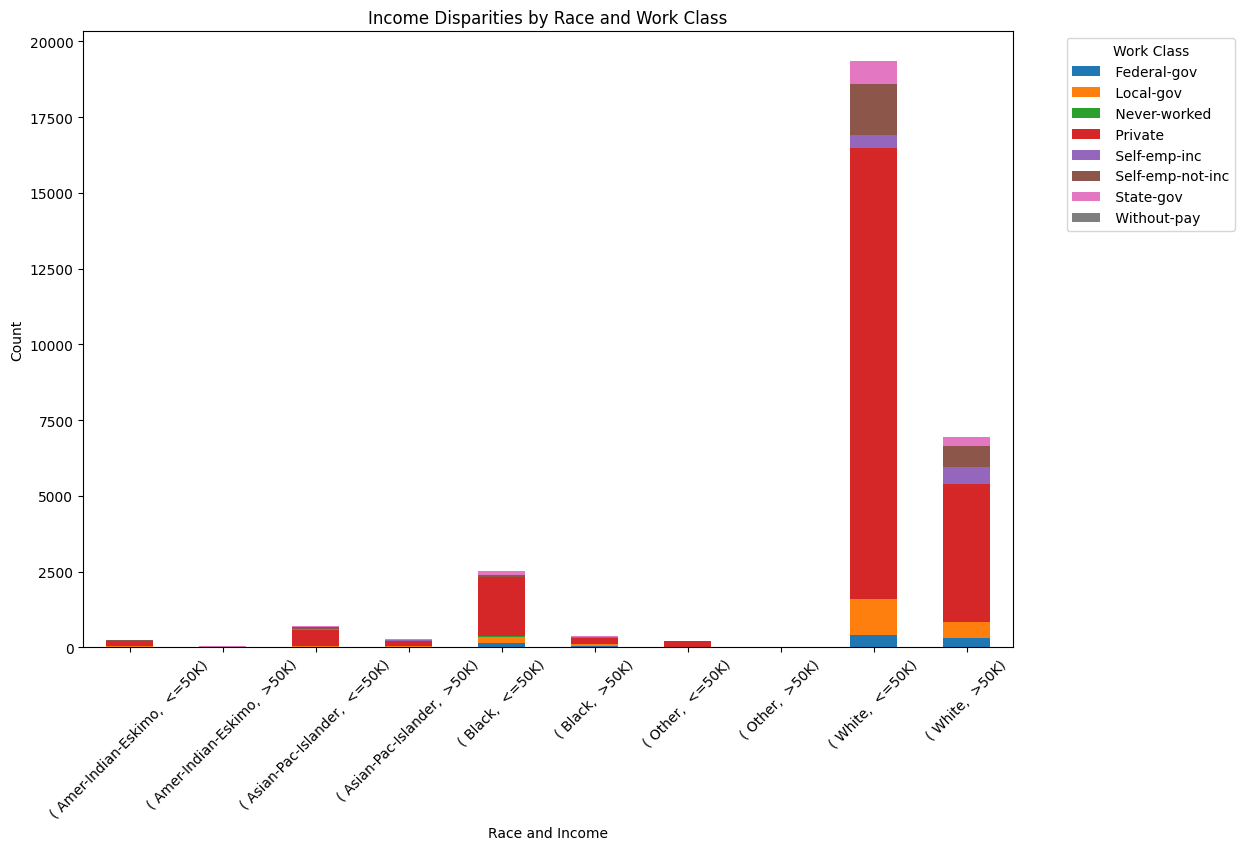

In [7]:

# Filter relevant columns
relevant_columns = ['race', 'workclass', 'income']
filtered_data = clean_data[relevant_columns]

# Group data by race, work class, and income, and count occurrences
grouped_data = filtered_data.groupby(['race', 'workclass', 'income']).size().reset_index(name='count')

# Pivot the data to create a matrix for the stacked bar chart
pivot_data = grouped_data.pivot_table(index=['race', 'income'], columns='workclass', values='count', fill_value=0)

# Plotting the stacked bar chart
pivot_data.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Income Disparities by Race and Work Class')
plt.xlabel('Race and Income')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Work Class', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


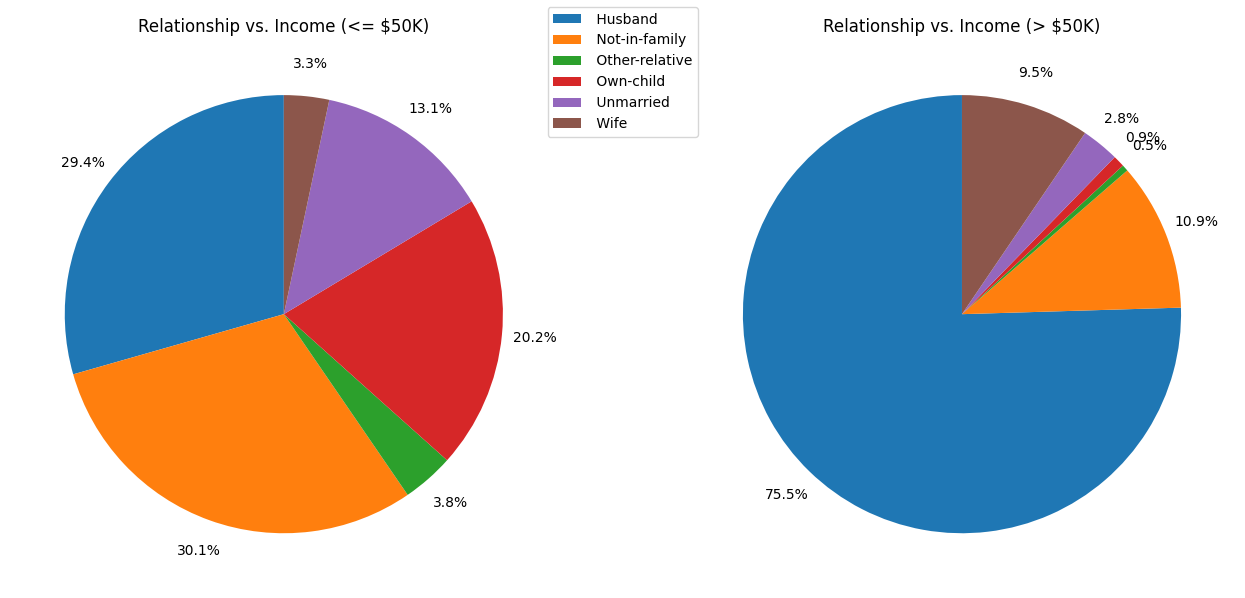

In [8]:
# Group data by relationship status and income, and count occurrences
relationship_income_counts = clean_data.groupby(['relationship', 'income']).size().unstack()

# Plot pie charts for each income level
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Plot pie chart for income <= $50K
wedges1, texts1 = axs[0].pie(relationship_income_counts[' <=50K'], labels=None, startangle=90)
axs[0].set_title('Relationship vs. Income (<= $50K)')

# Plot pie chart for income > $50K
wedges2, texts2 = axs[1].pie(relationship_income_counts[' >50K'], labels=None, startangle=90)
axs[1].set_title('Relationship vs. Income (> $50K)')

# Calculate percentage values
percentages1 = relationship_income_counts[' <=50K'] / relationship_income_counts[' <=50K'].sum() * 100
percentages2 = relationship_income_counts[' >50K'] / relationship_income_counts[' >50K'].sum() * 100

# Add percentage labels next to the relationship labels
for wedge, pct in zip(wedges1, percentages1):
    angle = (wedge.theta2 - wedge.theta1) / 2.0 + wedge.theta1
    x = wedge.r * 1.15 * np.cos(angle * np.pi / 180)  # Increased distance from the circle
    y = wedge.r * 1.15 * np.sin(angle * np.pi / 180)  # Increased distance from the circle
    axs[0].text(x, y, f'{pct:.1f}%', ha='center', va='center', fontsize=10)  # Increased font size

for wedge, pct in zip(wedges2, percentages2):
    angle = (wedge.theta2 - wedge.theta1) / 2.0 + wedge.theta1
    x = wedge.r * 1.15 * np.cos(angle * np.pi / 180)  # Increased distance from the circle
    y = wedge.r * 1.15 * np.sin(angle * np.pi / 180)  # Increased distance from the circle
    axs[1].text(x, y, f'{pct:.1f}%', ha='center', va='center', fontsize=10)  # Increased font size

# Create custom legend
legend_labels = relationship_income_counts.index
fig.legend(wedges1, legend_labels, loc='upper center')

plt.tight_layout()
plt.show()
